## Synthetic Masks over Faces

In [2]:
import cv2
import dlib
import numpy as np
import os
import imutils
from matplotlib import pyplot as plt

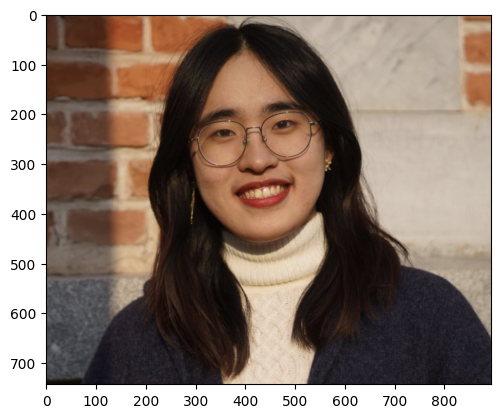

In [3]:
# Sample Image Path
path = '/Users/anqizhou/Documents/GitHub/anqi.png'

# Load the image using cv2
img = cv2.imread(path) # default color order: BGR
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change it to RGB for display

# Display the image
plt.imshow(RGB_img)

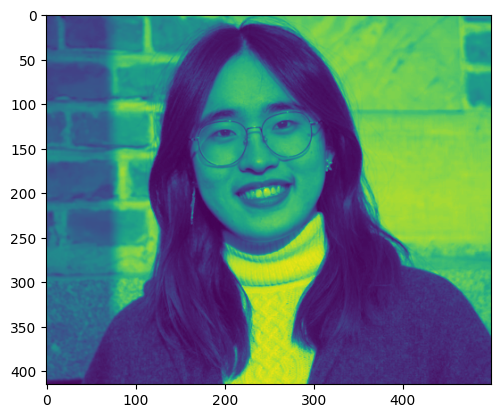

In [4]:
# Resize
img = imutils.resize(img, width = 500)

# Convert into gray scale to make it easier & more computationally efficient to train
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the processed img
plt.imshow(gray_img)

In [5]:
# Initialize the face detector & shape_predictor
hog_face_detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Detect face in the grayscale image 
# '1' -> upsample the img once
faces = hog_face_detector(gray_img, 1)

# Bounding Rectangles Coordinates
print(faces)

rectangles[[(150, 81) (304, 236)]]


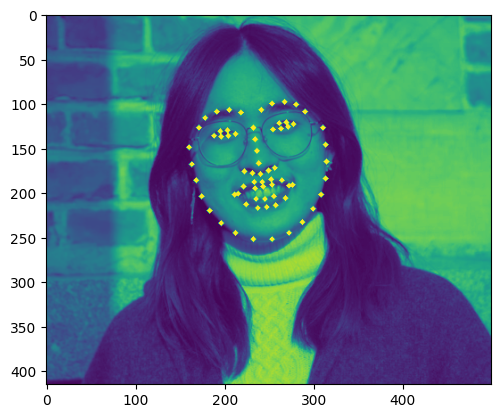

In [6]:
# Different colors of facial masks
color_blue = (135,206,250)
color_white = (255, 255, 255)
color_black = (0, 0, 0)

for face in faces:
    # Extract the facial landmarks
    face_landmarks = dlib_facelandmark(gray_img, face)
    
    # Draw all 68 points on the face
    for n in range(0, 68):
            x = face_landmarks.part(n).x
            y = face_landmarks.part(n).y
            labeled_img = cv2.circle(gray_img, (x, y), 1, (255, 255, 255), 3)
    
    # Create & store the landmarks to overlay facial masks
    points = []
    for i in range(1, 16):
        point = [face_landmarks.part(i).x, face_landmarks.part(i).y]
        points.append(point)
        
    # Additional 3 points for wide, high coverage mask 
    w_h = [((face_landmarks.part(42).x), (face_landmarks.part(15).y)),
           ((face_landmarks.part(27).x), (face_landmarks.part(27).y)),
           ((face_landmarks.part(39).x), (face_landmarks.part(1).y))]

    # Additional 1 point for wide, medium coverage mask 
    w_m = [((face_landmarks.part(29).x), (face_landmarks.part(29).y))]

    # Additional 5 points for wide, low coverage mask 
    w_l = [((face_landmarks.part(35).x), (face_landmarks.part(35).y)),
           ((face_landmarks.part(34).x), (face_landmarks.part(34).y)),
           ((face_landmarks.part(33).x), (face_landmarks.part(33).y)),
           ((face_landmarks.part(32).x), (face_landmarks.part(32).y)),
           ((face_landmarks.part(31).x), (face_landmarks.part(31).y))]

    mask_w_h = np.array(points + w_h)
    mask_w_m = np.array(points + w_m)
    mask_w_l = np.array(points + w_l)

plt.imshow(labeled_img)

<Figure size 640x480 with 0 Axes>

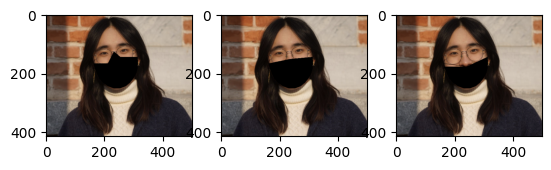

In [7]:
# Can try different colors of facial masks
color_black = (0, 0, 0)

# Overlay a facial mask using cv2 fillConvexPoly
w_h_img = cv2.fillConvexPoly(img, np.int32(mask_w_h), color_black)

img = img = cv2.imread(path)
img = imutils.resize(img, width = 500)
w_m_img = cv2.fillConvexPoly(img, np.int32(mask_w_m), color_black)
img = img = cv2.imread(path)
img = imutils.resize(img, width = 500)
w_l_img = cv2.fillConvexPoly(img, np.int32(mask_w_l), color_black)


plt.figure()

# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images. In this case I have stacked 3 images vertically
axarr[0].imshow(cv2.cvtColor(w_h_img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(w_m_img, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(w_l_img, cv2.COLOR_BGR2RGB))

In [8]:
# Pack the above operations together to ease application
# Return the image
def wear_mask(img_path, mask_style):
    # Load, resize, convert to gray scale
    img = cv2.imread(img_path)
    img = imutils.resize(img, width = 500)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initialize the face detector & shape_predictor
    hog_face_detector = dlib.get_frontal_face_detector()
    dlib_facelandmark = dlib.shape_predictor("/Users/anqizhou/Documents/GitHub/shape_predictor_68_face_landmarks.dat")

    # Detect face in the grayscale image 
    faces = hog_face_detector(gray_img, 1)
    
    for face in faces:
        # Extract the facial landmarks
        face_landmarks = dlib_facelandmark(gray_img, face)

        # Draw all 68 points on the face
        for n in range(0, 68):
                x = face_landmarks.part(n).x
                y = face_landmarks.part(n).y
                labeled_img = cv2.circle(gray_img, (x, y), 1, (255, 255, 255), 3)

        # Create & store the landmarks to overlay facial masks
        points = []
        for i in range(1, 16):
            point = [face_landmarks.part(i).x, face_landmarks.part(i).y]
            points.append(point)

        # Can try different colors of facial masks
        color_black = (0, 0, 0)

        if mask_style == 'high':
            # Additional 3 points for wide, high coverage mask 
            w_h = [((face_landmarks.part(42).x), (face_landmarks.part(15).y)),
                   ((face_landmarks.part(27).x), (face_landmarks.part(27).y)),
                   ((face_landmarks.part(39).x), (face_landmarks.part(1).y))]

            mask_w_h = np.array(points + w_h, dtype=np.int32)

            # Overlay a facial mask using cv2 fillConvexPoly
            w_h_img = cv2.fillPoly(img, [mask_w_h], color_black)

            return w_h_img

        elif mask_style == 'medium':
            # Additional 1 point for wide, medium coverage mask 
            w_m = [((face_landmarks.part(29).x), (face_landmarks.part(29).y))]

            mask_w_m = np.array(points + w_m, dtype=np.int32)

            w_m_img = cv2.fillPoly(img, [mask_w_m], color_black)

            return w_m_img

        else: 
            # Additional 5 points for wide, low coverage mask 
            w_l = [((face_landmarks.part(35).x), (face_landmarks.part(35).y)),
                   ((face_landmarks.part(34).x), (face_landmarks.part(34).y)),
                   ((face_landmarks.part(33).x), (face_landmarks.part(33).y)),
                   ((face_landmarks.part(32).x), (face_landmarks.part(32).y)),
                   ((face_landmarks.part(31).x), (face_landmarks.part(31).y))]

            mask_w_l = np.array(points + w_l, dtype=np.int32)
            
            w_l_img = cv2.fillPoly(img, [mask_w_l], color_black)
        
        return w_l_img

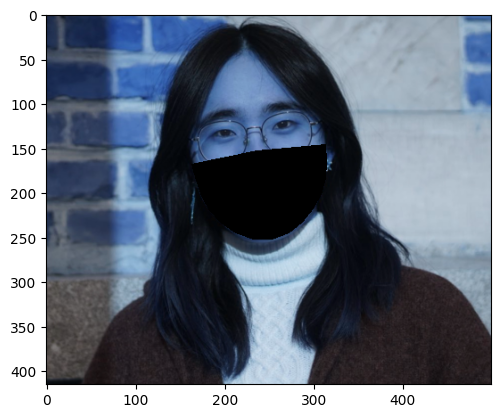

In [9]:
path = '/Users/anqizhou/Documents/GitHub/anqi.png'
plt.imshow(wear_mask(path, 'medium'))

### Apply the Mask Generator to the LFW Dataset

In [19]:
import numpy as np
# Set a Seed for Reproducibility
np.random.seed(26)  

import tqdm
import os
from os import listdir
from PIL import Image

In [10]:
image_path ="/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw-deepfunneled"
save_image_path = '/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw_masked'
#image_path = "/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart"
#attributes_path = "/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw_attributes.txt"

In [11]:
# Walk down the folder path
for root, dirs, files in os.walk(image_path, topdown=True):
    for dir in tqdm.tqdm(dirs):
        # Extract the root name
        fs = os.listdir(root + '/' + dir)
        # Modify to new names
        for name in fs:
            new_root = root.replace(image_path, save_image_path)
            new_root = new_root + '/' + dir
            #print(new_root)
            # Create paths if not exists
            if not os.path.exists(new_root):
                os.makedirs(new_root)
            # wear masks & save images to the new working directory
            imgpath = os.path.join(root, dir, name)
            save_imgpath = os.path.join(new_root, name)
            if os.path.exists(save_imgpath):
                pass   
            else:
                if wear_mask(imgpath, 'medium') is None:
                    print(imgpath)
                else: 
                    im = Image.fromarray(wear_mask(imgpath, 'medium'))
                im.save(os.path.join(new_root, name))

100%|█████████████████████████████████████| 5749/5749 [00:00<00:00, 6319.30it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

## Facial Recognition

In [10]:
# identify faces
#%pip install mtcnn
from mtcnn.mtcnn import MTCNN
# visualize bounding boxes
import matplotlib.patches as patches
# CNN
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, AveragePooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

import pandas as pd
import os.path
from os import path
import shutil
import warnings
warnings.filterwarnings("ignore")

2023-02-21 16:58:17.783764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exploratory Data Analysis

In [11]:
# Data read-in and cleaning
lfw_allnames = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw_allnames.csv")
matchpairsDevTest = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/matchpairsDevTest.csv")
matchpairsDevTrain = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/matchpairsDevTrain.csv")
mismatchpairsDevTest = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/mismatchpairsDevTest.csv")
mismatchpairsDevTrain = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/mismatchpairsDevTrain.csv")
pairs = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/pairs.csv")
people = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/people.csv")
peopleDevTest = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/peopleDevTest.csv")
peopleDevTrain = pd.read_csv("/Users/anqizhou/Documents/GitHub/lfw_dataset/peopleDevTrain.csv")

# Rename columns and divide into matched & unmatched
pairs = pairs.rename(columns ={'name': 'name1', 'Unnamed: 3': 'name2'})
matched_pairs = pairs[pairs["name2"].isnull()].drop("name2",axis=1)
mismatched_pairs = pairs[pairs["name2"].notnull()]

# Remove null values
people = people[people.name.notnull()]

In [12]:
# Based on lfw names csv, add a column with the corresponding paths
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
# Count how many images there are for each individual
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
# Reformat to 0001, 0002, etc.
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
# Concatenate the string
root_path = '/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw_masked'
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths = image_paths.drop("images", 1)
image_paths

,name,image_path
0,AJ_Cook,AJ_Cook/AJ_Cook_0001.jpg
1,AJ_Lamas,AJ_Lamas/AJ_Lamas_0001.jpg
2,Aaron_Eckhart,Aaron_Eckhart/Aaron_Eckhart_0001.jpg
3,Aaron_Guiel,Aaron_Guiel/Aaron_Guiel_0001.jpg
4,Aaron_Patterson,Aaron_Patterson/Aaron_Patterson_0001.jpg
...,...,...
5744,Zorica_Radovic,Zorica_Radovic/Zorica_Radovic_0001.jpg
5745,Zulfiqar_Ahmed,Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg
5746,Zumrati_Juma,Zumrati_Juma/Zumrati_Juma_0001.jpg
5747,Zurab_Tsereteli,Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg


<AxesSubplot: ylabel='Number of photos'>

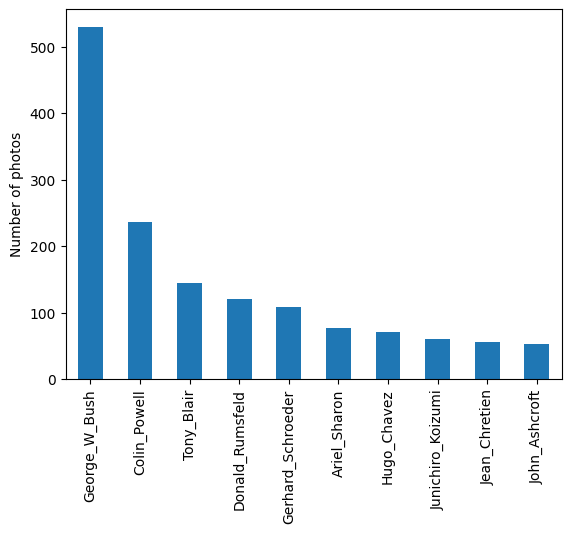

In [13]:
# During the mask overlay, I found that the LFW dataset has a significant weakness:
# some celebrities have much more photos than others (imbalanced dataset).
image_paths['name'].value_counts()[:10].plot(kind = "bar", ylabel = 'Number of photos')

In [14]:
# Split into test, train sets: 20% for test
lfw_train, lfw_test = train_test_split(image_paths, test_size=0.2)
lfw_train = lfw_train.reset_index().drop("index", 1)
lfw_test = lfw_test.reset_index().drop("index", 1)

In [15]:
# Verify the shape of two sets & overlapping
print(lfw_train.shape)
print(lfw_test.shape)
print(len(set(lfw_train.name).intersection(set(lfw_test.name))))
print(len(set(lfw_test.name) - set(lfw_train.name)))

(10586, 2)
(2647, 2)
837
838


### CNN

2023-02-21 16:59:55.125265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 130ms/step


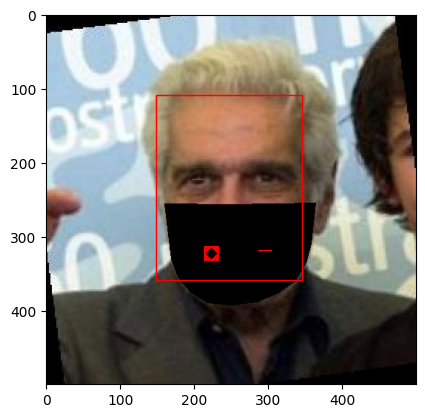

In [16]:
# Try MTCNN as facial detector (masked faces)
detector = MTCNN()
image = cv2.imread(root_path+'/'+str(lfw_train.image_path[10]))
result = detector.detect_faces(image)

# Extract the bounding box and keypoints (internal features)
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

# Plotting
fig,ax = plt.subplots(1)
ax.imshow(image)
# Create a Rectangle patch
rect = patches.Rectangle(bounding_box[0:2],
                         bounding_box[2],
                         bounding_box[3],
                         linewidth=1,
                         edgecolor='r',
                         facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
# Visualize all the internal features
for key in keypoints:
    rect_key = patches.Rectangle(keypoints[key],1,1,linewidth=10,edgecolor='r',facecolor='none')
    ax.add_patch(rect_key)
plt.show()

1/1 [==============================] - 0s 126ms/step


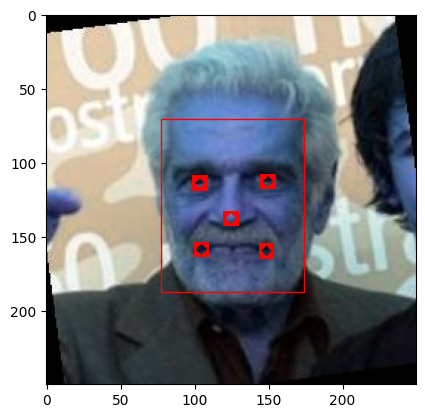

In [17]:
# Compare with normal face
# Locate the original photo
root_origin = '/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw-deepfunneled/'
detector = MTCNN()
image = cv2.imread(root_origin+'/'+str(lfw_train.image_path[10]))
result = detector.detect_faces(image)

# Extract the bounding box and keypoints (internal features)
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

# Plotting
fig,ax = plt.subplots(1)
ax.imshow(image)
# Create a Rectangle patch
rect = patches.Rectangle(bounding_box[0:2],
                         bounding_box[2],
                         bounding_box[3],
                         linewidth=1,
                         edgecolor='r',
                         facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
# Visualize all the internal features
for key in keypoints:
    rect_key = patches.Rectangle(keypoints[key],1,1,linewidth=10,edgecolor='r',facecolor='none')
    ax.add_patch(rect_key)
plt.show()

Due to the imposed masks, MTCNN cannot recognize some of the facial features (need to try other facial detection techniques). 

In [20]:
# Verify whether images have the same dimension
widths = []
heights = []
files = image_paths.image_path
for file in files:
    path = root_origin + str(file)
    im = Image.open(path)
    widths.append(im.width)
    heights.append(im.height)

pd.DataFrame({'height':heights,'width':widths}).describe()

,height,width
count,13233.0,13233.0
mean,250.0,250.0
std,0.0,0.0
min,250.0,250.0
25%,250.0,250.0
50%,250.0,250.0
75%,250.0,250.0
max,250.0,250.0


In [21]:
# Imbalanced datasets
# Display the top 10 celebrities with the most photos
names = image_paths['name'].value_counts()[:10]
names

George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
Ariel_Sharon          77
Hugo_Chavez           71
Junichiro_Koizumi     60
Jean_Chretien         55
John_Ashcroft         53
Name: name, dtype: int64

In [22]:
data = pd.concat([image_paths[image_paths.name=="George_W_Bush"].sample(50),
                  image_paths[image_paths.name=="Colin_Powell"].sample(50),
                  image_paths[image_paths.name=="Tony_Blair"].sample(50),
                  image_paths[image_paths.name=="Donald_Rumsfeld"].sample(50),
                  image_paths[image_paths.name=="Gerhard_Schroeder"].sample(50),
                  image_paths[image_paths.name=="Ariel_Sharon"].sample(50),
                  image_paths[image_paths.name=="Hugo_Chavez"].sample(50),
                  image_paths[image_paths.name=="Junichiro_Koizumi"].sample(50),
                  image_paths[image_paths.name=="Jean_Chretien"].sample(50),
                  image_paths[image_paths.name=="John_Ashcroft"].sample(50)])

In [23]:
# # Because of the imbalanced dataset, 
# # downsample the overrepresented groups (e.g. Bush has 530+ photos)->CNN has better performance over balanced dataset
# grouped = image_paths.groupby('name').apply(lambda x: x.sample(grouped.image_path.value_counts().min())).reset_index(drop=True)
# grouped.head()
# split into train, test data
cnn_train, cnn_test = train_test_split(data, test_size=0.2)
# withhold validation data
cnn_train, cnn_val = train_test_split(cnn_train, test_size=0.2)
# cnn_train = cnn_train.reset_index().drop("index", 1)
# cnn_test = cnn_test.reset_index().drop("index", 1)
print(cnn_train.shape)
print(cnn_test.shape)

(320, 2)
(100, 2)


In [24]:
# helper function to move images
def directory_mover(data, dir_name):
    co = 0
    root = '/Users/anqizhou/Documents/GitHub/lfw_dataset'
    for image in data.image_path:
        # create top directory
        if not os.path.exists(os.path.join(root, dir_name)):
            shutil.os.mkdir(os.path.join(root, dir_name))
        
        data_type = data[data['image_path'] == image]['name']
        data_type = str(list(data_type)[0])
        if not os.path.exists(os.path.join(root, dir_name, data_type)):
            shutil.os.mkdir(os.path.join(root, dir_name,data_type))
        path_from = os.path.join('/Users/anqizhou/Documents/GitHub/lfw_dataset/lfw-deepfunneled/lfw_masked/', image)
        path_to = os.path.join(root, dir_name, data_type)
        # print(path_to)
        shutil.copy(path_from, path_to)
        # print('Moved {} to {}'.format(image,path_to))
        co += 1
        
    print('Moved {} images to {} folder.'.format(co,dir_name))

In [25]:
# Move images into directory
directory_mover(cnn_train, "cnn_train/")
directory_mover(cnn_val, "cnn_val/")
directory_mover(cnn_test, "cnn_test/")

Moved 320 images to cnn_train/ folder.
Moved 80 images to cnn_val/ folder.
Moved 100 images to cnn_test/ folder.


In [75]:
# Baseline CNN Model
base_model = Sequential()

# Input and first convolutional layer, kernel 5*5
base_model.add(Conv2D(32, (3,3), input_shape=(250, 250, 3), activation='relu'))

# Second convolutional layer
base_model.add(Conv2D(64, (3,3), activation='relu'))

# Pooling layer 1
base_model.add(AveragePooling2D(pool_size=(2,2)))

# Dropout after pooling 1
base_model.add(Dropout(0.2))

# Flatten layer
base_model.add(Flatten())

# Fully connected layer
base_model.add(Dense(128, activation='relu'))

# Dropout set to 50%.
base_model.add(Dropout(0.5))

# Output layer
base_model.add(Dense(units = 10, activation = 'softmax'))

print(base_model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 conv2d_47 (Conv2D)          (None, 246, 246, 64)      18496     
                                                                 
 average_pooling2d_11 (Avera  (None, 123, 123, 64)     0         
 gePooling2D)                                                    
                                                                 
 dropout_22 (Dropout)        (None, 123, 123, 64)      0         
                                                                 
 flatten_15 (Flatten)        (None, 968256)            0         
                                                                 
 dense_36 (Dense)            (None, 128)               123936896 
                                                     

In [76]:
# Compile the model 
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [41]:
# Prepare for modeling
# Get the input of the original data and further transforms the data (as output)
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
root = '/Users/anqizhou/Documents/GitHub/lfw_dataset/'
# Split the training set into many batches
# Set the batch size to 32: 32 training samples used in one iteration
training_set = train_datagen.flow_from_directory(root+'cnn_train/',
                                                 target_size = (250, 250),
                                                 #batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory(root+'cnn_val/',
                                            target_size = (250, 250),
                                            #batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(root+'cnn_test/',
                                            target_size = (250, 250),
                                            #batch_size = 32,
                                            class_mode = 'categorical')

Found 320 images belonging to 10 classes.
Found 154 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [78]:
# Terms
# Epoch: one full cycle through the training dataset
model_history = base_model.fit_generator(training_set,
                                         steps_per_epoch = 10,
                                         epochs = 30,
                                         validation_data = val_set,
                                         validation_steps = 2)

Epoch 1/30
10/10 [==============================] - 44s 4s/step - loss: 1.9372 - accuracy: 0.3187 - val_loss: 1.9739 - val_accuracy: 0.3125
Epoch 2/30
10/10 [==============================] - 45s 4s/step - loss: 1.8590 - accuracy: 0.3750 - val_loss: 1.9829 - val_accuracy: 0.2500
Epoch 3/30
10/10 [==============================] - 44s 4s/step - loss: 1.8497 - accuracy: 0.3313 - val_loss: 1.9160 - val_accuracy: 0.3125
Epoch 4/30
10/10 [==============================] - 44s 4s/step - loss: 1.7275 - accuracy: 0.4125 - val_loss: 1.8634 - val_accuracy: 0.4062
Epoch 5/30
10/10 [==============================] - 44s 4s/step - loss: 1.6649 - accuracy: 0.4125 - val_loss: 1.8840 - val_accuracy: 0.3281
Epoch 6/30
10/10 [==============================] - 51s 5s/step - loss: 1.7279 - accuracy: 0.4187 - val_loss: 1.8335 - val_accuracy: 0.3281
Epoch 7/30
10/10 [==============================] - 46s 5s/step - loss: 1.5999 - accuracy: 0.4219 - val_loss: 1.6786 - val_accuracy: 0.4062
Epoch 8/30
10/10 [==

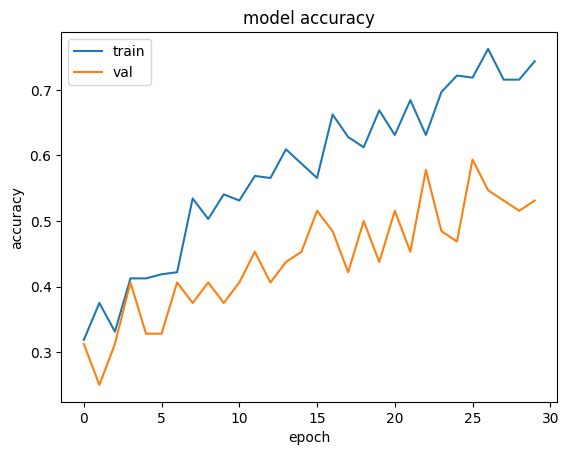

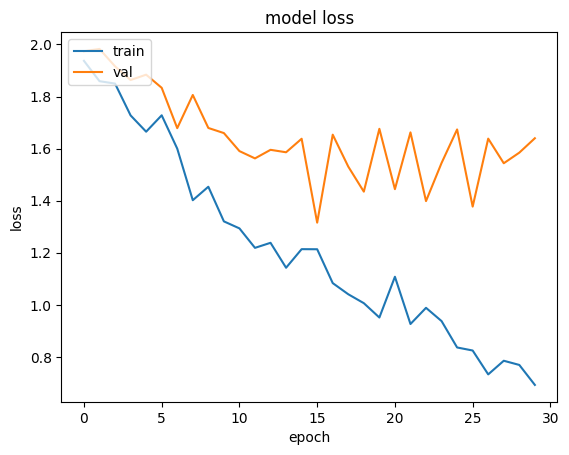

In [79]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
from collections import OrderedDict

# Retrieve the order of classes (passed through in a random order)
test_names = []
# Collect all file names
for i in range(len(test_set.filenames)):
    test_names.append(test_set.filenames[i])
# Extract unique names, in order
for i in range(len(test_names)):
    #print(test_names[i].split("/")[0])
    test_names[i] = test_names[i].split("/")[0]
test_name_order = list(OrderedDict.fromkeys(test_names))
test_name_order

['Ariel_Sharon',
 'Colin_Powell',
 'Donald_Rumsfeld',
 'George_W_Bush',
 'Gerhard_Schroeder',
 'Hugo_Chavez',
 'Jean_Chretien',
 'John_Ashcroft',
 'Junichiro_Koizumi',
 'Tony_Blair']

In [101]:
import keras.utils as image

# Define a helper function
# Use selected classifier to predict images in the dir -> 
def predictions(dir_name, classifier):
    # dir_name should include name of predicted invididual - could edit this to iterate through folders in future
    predictions = []
    for img in os.listdir(dir_name):
        test_image = image.load_img(dir_name + str(img), target_size = (250,250))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = np.argmax(classifier.predict(test_image))
        predictions.append(result)
    return(predictions)

# Compute precision, accuracy, recall based on tp, tn, fp, fn
def cal_pred_acc(df):
    precision = []
    accuracy = []
    recall = []
    for i in range(len(set(df.Predictions))):
        tp = df[np.logical_and(df['Actual'] == i, df['Predictions'] == i)].shape[0]
        tn = df[np.logical_and(df['Actual'] != i, df['Predictions'] != i)].shape[0]
        fp = df[np.logical_and(df['Actual'] != i, df['Predictions'] == i)].shape[0]
        fn = df[np.logical_and(df['Actual'] == i, df['Predictions'] != i)].shape[0]
        total_preds = df.shape[0]
        precision.append(tp/(tp + fp))
        accuracy.append((tp + tn)/total_preds)
        recall.append(tp/(tp + fn))
    return (accuracy, precision, recall)

In [97]:
dir_name = '/Users/anqizhou/Documents/GitHub/lfw_dataset/cnn_test/'
p0 = predictions(dir_name + test_name_order[0] + "/", base_model)
p1 = predictions(dir_name + test_name_order[1] + "/", base_model)
p2 = predictions(dir_name + test_name_order[2] + "/", base_model)
p3 = predictions(dir_name + test_name_order[3] + "/", base_model)
p4 = predictions(dir_name + test_name_order[4] + "/", base_model)
p5 = predictions(dir_name + test_name_order[5] + "/", base_model)
p6 = predictions(dir_name + test_name_order[6] + "/", base_model)
p7 = predictions(dir_name + test_name_order[7] + "/", base_model)
p8 = predictions(dir_name + test_name_order[8] + "/", base_model)
p9 = predictions(dir_name + test_name_order[9] + "/", base_model)

1/1 [==============================] - 0s 91ms/step


In [98]:
pred_df = pd.DataFrame(list(zip(p0 + p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9, 
                                [0] * len(p0) + [1] * len(p1) + [2] * len(p2) + [3] * len(p3) + [4] * len(p4) + [5] * len(p5) + [6] * len(p6) + [7] * len(p7) + [8] * len(p8) + [9] * len(p9))),
                                columns = ['Predictions', 'Actual'])

In [106]:
test_acc = cal_pred_acc(pred_df)
df = pd.DataFrame(list(zip(test_name_order, test_acc[0], test_acc[1], test_acc[2])), 
                  columns =['Names', 'Accuracy', 'Precision', 'Recall'])
df.round(2)

,Names,Accuracy,Precision,Recall
0,Ariel_Sharon,0.93,1.00,0.46
1,Colin_Powell,0.94,0.71,0.56
2,Donald_Rumsfeld,0.92,0.57,0.44
3,George_W_Bush,0.85,0.25,0.18
4,Gerhard_Schroeder,0.90,0.54,0.64
5,Hugo_Chavez,0.98,0.86,0.86
6,Jean_Chretien,0.92,0.40,0.29
7,John_Ashcroft,0.92,0.62,0.50
8,Junichiro_Koizumi,0.90,0.58,0.58
9,Tony_Blair,0.76,0.26,0.64


In [71]:
# CNN Model A: kernel size 5*5
modelA = Sequential()

# Input and first convolutional layer
modelA.add(Conv2D(32, (5,5), input_shape=(250, 250, 3), activation='relu'))

# Second convolutional layer
modelA.add(Conv2D(64, (5,5), activation='relu'))

# Pooling layer 1
modelA.add(AveragePooling2D(pool_size=(2,2)))

# Dropout after pooling 1
modelA.add(Dropout(0.2))

# Flatten layer
modelA.add(Flatten())

# Fully connected layer
modelA.add(Dense(128, activation='relu'))

# Dropout set to 50%.
modelA.add(Dropout(0.5))

# Output layer
modelA.add(Dense(units = 10, activation = 'softmax'))

print(modelA.summary())

# Compile the model 
modelA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 246, 246, 32)      2432      
                                                                 
 conv2d_45 (Conv2D)          (None, 242, 242, 64)      51264     
                                                                 
 average_pooling2d_10 (Avera  (None, 121, 121, 64)     0         
 gePooling2D)                                                    
                                                                 
 dropout_20 (Dropout)        (None, 121, 121, 64)      0         
                                                                 
 flatten_14 (Flatten)        (None, 937024)            0         
                                                                 
 dense_34 (Dense)            (None, 128)               119939200 
                                                     

In [73]:
modelA_history = modelA.fit_generator(training_set,
                                      steps_per_epoch = 10,
                                      epochs = 30,
                                      validation_data = val_set,
                                      validation_steps = 2)

Epoch 1/30
10/10 [==============================] - 80s 8s/step - loss: 1.7817 - accuracy: 0.4031 - val_loss: 1.9245 - val_accuracy: 0.3281
Epoch 2/30
10/10 [==============================] - 82s 8s/step - loss: 1.7195 - accuracy: 0.4375 - val_loss: 1.9177 - val_accuracy: 0.2969
Epoch 3/30
10/10 [==============================] - 79s 8s/step - loss: 1.6470 - accuracy: 0.4094 - val_loss: 1.8464 - val_accuracy: 0.3438
Epoch 4/30
10/10 [==============================] - 83s 8s/step - loss: 1.5886 - accuracy: 0.4625 - val_loss: 1.8034 - val_accuracy: 0.4375
Epoch 5/30
10/10 [==============================] - 80s 8s/step - loss: 1.4067 - accuracy: 0.5250 - val_loss: 1.6657 - val_accuracy: 0.4531
Epoch 6/30
10/10 [==============================] - 79s 8s/step - loss: 1.3912 - accuracy: 0.5094 - val_loss: 1.7425 - val_accuracy: 0.3906
Epoch 7/30
10/10 [==============================] - 78s 8s/step - loss: 1.3880 - accuracy: 0.5156 - val_loss: 1.7930 - val_accuracy: 0.3594
Epoch 8/30
10/10 [==

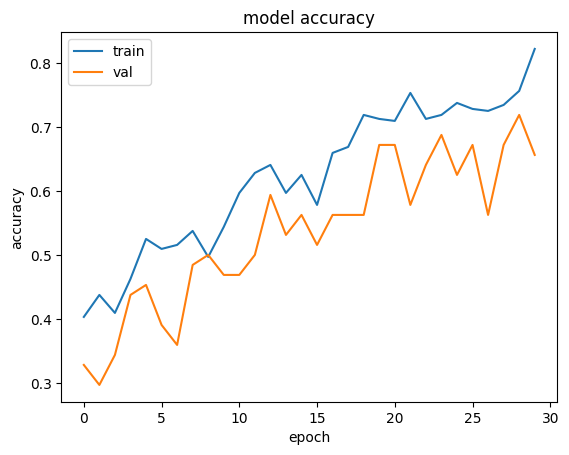

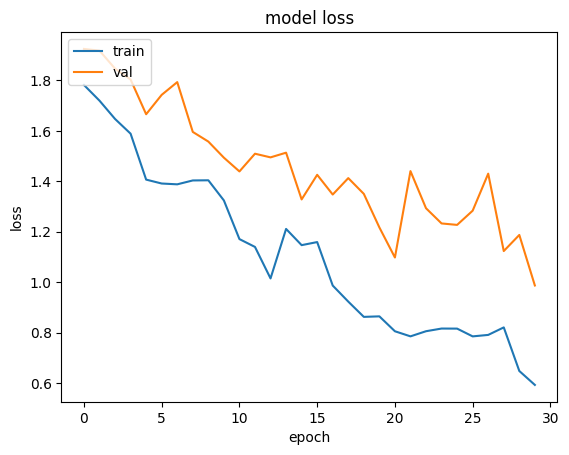

In [74]:
plt.plot(modelA_history.history['accuracy'])
plt.plot(modelA_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(modelA_history.history['loss'])
plt.plot(modelA_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [107]:
dir_name = '/Users/anqizhou/Documents/GitHub/lfw_dataset/cnn_test/'
p0A = predictions(dir_name + test_name_order[0] + "/", modelA)
p1A = predictions(dir_name + test_name_order[1] + "/", modelA)
p2A = predictions(dir_name + test_name_order[2] + "/", modelA)
p3A = predictions(dir_name + test_name_order[3] + "/", modelA)
p4A = predictions(dir_name + test_name_order[4] + "/", modelA)
p5A = predictions(dir_name + test_name_order[5] + "/", modelA)
p6A = predictions(dir_name + test_name_order[6] + "/", modelA)
p7A = predictions(dir_name + test_name_order[7] + "/", modelA)
p8A = predictions(dir_name + test_name_order[8] + "/", modelA)
p9A = predictions(dir_name + test_name_order[9] + "/", modelA)

1/1 [==============================] - 0s 110ms/step


In [109]:
pred_dfA = pd.DataFrame(list(zip(p0A + p1A + p2A + p3A + p4A + p5A + p6A + p7A + p8A + p9A, 
                                 [0] * len(p0A) + [1] * len(p1A) + [2] * len(p2A) + [3] * len(p3A) + [4] * len(p4A) + [5] * len(p5A) + [6] * len(p6A) + [7] * len(p7A) + [8] * len(p8A) + [9] * len(p9A))),
                                 columns = ['Predictions', 'Actual'])

test_accA = cal_pred_acc(pred_dfA)
dfA = pd.DataFrame(list(zip(test_name_order, test_accA[0], test_accA[1], test_accA[2])), 
                   columns =['Names', 'Accuracy', 'Precision', 'Recall'])
dfA.round(2)

,Names,Accuracy,Precision,Recall
0,Ariel_Sharon,0.94,1.00,0.54
1,Colin_Powell,0.97,0.88,0.78
2,Donald_Rumsfeld,0.92,0.56,0.56
3,George_W_Bush,0.86,0.40,0.55
4,Gerhard_Schroeder,0.92,0.67,0.55
5,Hugo_Chavez,0.91,0.42,0.71
6,Jean_Chretien,0.90,0.33,0.43
7,John_Ashcroft,0.93,0.71,0.50
8,Junichiro_Koizumi,0.93,0.69,0.75
9,Tony_Blair,0.88,0.45,0.45


In [81]:
# CNN Model B: kernel size 5*5
modelB = Sequential()

# Input and first convolutional layer
modelB.add(Conv2D(32, (5,5), input_shape=(250, 250, 3), activation='relu'))

# Second convolutional layer
modelB.add(Conv2D(64, (5,5), activation='relu'))

# Pooling layer 1
modelB.add(AveragePooling2D(pool_size=(2,2)))

# Dropout after pooling 1
modelB.add(Dropout(0.2))

# Third convolutional layer
modelB.add(Conv2D(128, (5,5), activation='relu'))

# Pooling layer 2
modelB.add(AveragePooling2D(pool_size=(2,2)))

# Dropout after pooling 2
modelB.add(Dropout(0.2))

# Flatten layer
modelB.add(Flatten())

# Fully connected layer
modelB.add(Dense(128, activation='relu'))

# Dropout set to 50%.
modelB.add(Dropout(0.5))

# Output layer
modelB.add(Dense(units = 10, activation = 'softmax'))

print(modelB.summary())

# Compile the model 
modelB.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 246, 246, 32)      2432      
                                                                 
 conv2d_49 (Conv2D)          (None, 242, 242, 64)      51264     
                                                                 
 average_pooling2d_12 (Avera  (None, 121, 121, 64)     0         
 gePooling2D)                                                    
                                                                 
 dropout_24 (Dropout)        (None, 121, 121, 64)      0         
                                                                 
 conv2d_50 (Conv2D)          (None, 117, 117, 128)     204928    
                                                                 
 average_pooling2d_13 (Avera  (None, 58, 58, 128)      0         
 gePooling2D)                                        

In [83]:
modelB_history = modelB.fit_generator(training_set,
                                      steps_per_epoch = 10,
                                      epochs = 30,
                                      validation_data = val_set,
                                      validation_steps = 2)

Epoch 1/30
10/10 [==============================] - 93s 9s/step - loss: 1.8046 - accuracy: 0.3906 - val_loss: 1.7940 - val_accuracy: 0.3438
Epoch 2/30
10/10 [==============================] - 98s 10s/step - loss: 1.6770 - accuracy: 0.4031 - val_loss: 1.7411 - val_accuracy: 0.4062
Epoch 3/30
10/10 [==============================] - 98s 10s/step - loss: 1.5811 - accuracy: 0.4531 - val_loss: 1.4767 - val_accuracy: 0.4844
Epoch 4/30
10/10 [==============================] - 96s 10s/step - loss: 1.4121 - accuracy: 0.5250 - val_loss: 1.3258 - val_accuracy: 0.5469
Epoch 5/30
10/10 [==============================] - 98s 10s/step - loss: 1.4007 - accuracy: 0.5375 - val_loss: 1.2475 - val_accuracy: 0.5625
Epoch 6/30
10/10 [==============================] - 104s 10s/step - loss: 1.2194 - accuracy: 0.5969 - val_loss: 1.1252 - val_accuracy: 0.6719
Epoch 7/30
10/10 [==============================] - 99s 10s/step - loss: 1.1491 - accuracy: 0.6250 - val_loss: 1.1608 - val_accuracy: 0.5469
Epoch 8/30
10

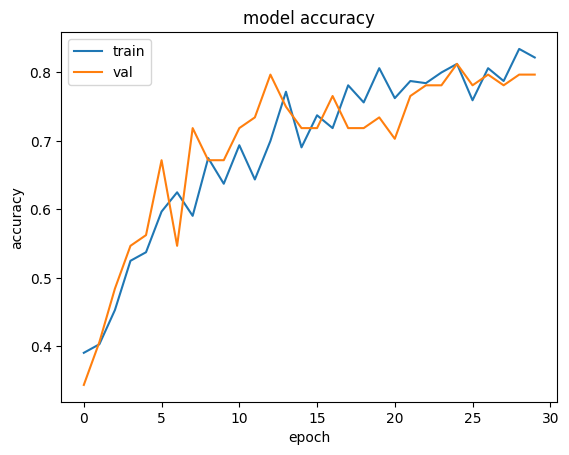

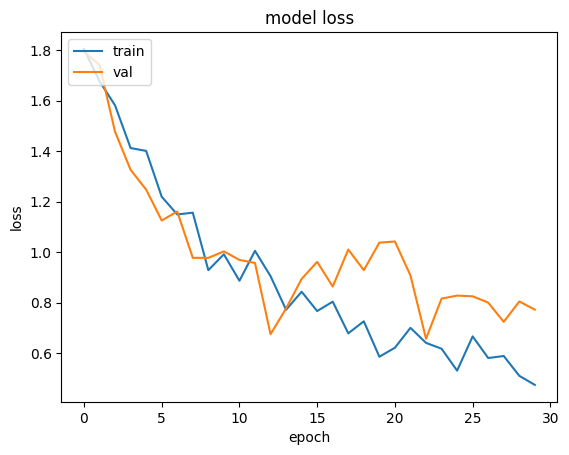

In [84]:
plt.plot(modelB_history.history['accuracy'])
plt.plot(modelB_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(modelB_history.history['loss'])
plt.plot(modelB_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [110]:
dir_name = '/Users/anqizhou/Documents/GitHub/lfw_dataset/cnn_test/'
p0B = predictions(dir_name + test_name_order[0] + "/", modelB)
p1B = predictions(dir_name + test_name_order[1] + "/", modelB)
p2B = predictions(dir_name + test_name_order[2] + "/", modelB)
p3B = predictions(dir_name + test_name_order[3] + "/", modelB)
p4B = predictions(dir_name + test_name_order[4] + "/", modelB)
p5B = predictions(dir_name + test_name_order[5] + "/", modelB)
p6B = predictions(dir_name + test_name_order[6] + "/", modelB)
p7B = predictions(dir_name + test_name_order[7] + "/", modelB)
p8B = predictions(dir_name + test_name_order[8] + "/", modelB)
p9B = predictions(dir_name + test_name_order[9] + "/", modelB)

1/1 [==============================] - 0s 109ms/step


In [111]:
pred_dfB = pd.DataFrame(list(zip(p0B + p1B + p2B + p3B + p4B + p5B + p6B + p7B + p8B + p9B, 
                                 [0] * len(p0B) + [1] * len(p1B) + [2] * len(p2B) + [3] * len(p3B) + [4] * len(p4B) + [5] * len(p5B) + [6] * len(p6B) + [7] * len(p7B) + [8] * len(p8B) + [9] * len(p9B))),
                                 columns = ['Predictions', 'Actual'])

test_accB = cal_pred_acc(pred_dfB)
dfB = pd.DataFrame(list(zip(test_name_order, test_accB[0], test_accB[1], test_accB[2])), 
                   columns =['Names', 'Accuracy', 'Precision', 'Recall'])
dfB.round(2)

,Names,Accuracy,Precision,Recall
0,Ariel_Sharon,0.98,1.00,0.85
1,Colin_Powell,0.96,0.78,0.78
2,Donald_Rumsfeld,0.94,1.00,0.33
3,George_W_Bush,0.90,0.53,0.73
4,Gerhard_Schroeder,0.94,0.86,0.55
5,Hugo_Chavez,0.95,0.62,0.71
6,Jean_Chretien,0.92,0.44,0.57
7,John_Ashcroft,0.94,0.67,0.80
8,Junichiro_Koizumi,0.98,1.00,0.83
9,Tony_Blair,0.89,0.50,0.73


### VGG16 Models

In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Initialize the VGG16 Model
vgg_model = VGG16(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

In [34]:
# Freeze 4 blocks and leave the block 5 unfrozen
# so the weights can get updated with each epoch
for layer in vgg_model.layers:
    layer.trainable = False

# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_8 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [43]:
flatten = Flatten()(vgg_model.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=10, activation='sigmoid')(dense_4) 

In [44]:
model = Model(inputs=vgg_model.input, outputs=dense_output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [46]:
model_history = model.fit_generator(training_set,
                                    steps_per_epoch = len(training_set),
                                    epochs = 30,
                                    validation_data = val_set,
                                    validation_steps = len(val_set))

Epoch 1/30
10/10 [==============================] - 235s 23s/step - loss: 2.6968 - accuracy: 0.1000 - val_loss: 2.2579 - val_accuracy: 0.1364
Epoch 2/30
10/10 [==============================] - 231s 23s/step - loss: 2.3112 - accuracy: 0.1594 - val_loss: 2.0871 - val_accuracy: 0.1234
Epoch 3/30
10/10 [==============================] - 234s 24s/step - loss: 1.8302 - accuracy: 0.3688 - val_loss: 1.6334 - val_accuracy: 0.4481
Epoch 4/30
10/10 [==============================] - 231s 23s/step - loss: 1.2984 - accuracy: 0.6687 - val_loss: 1.2717 - val_accuracy: 0.6688
Epoch 5/30
10/10 [==============================] - 231s 23s/step - loss: 0.9017 - accuracy: 0.7656 - val_loss: 1.0881 - val_accuracy: 0.6623
Epoch 6/30
10/10 [==============================] - 233s 23s/step - loss: 0.6126 - accuracy: 0.8469 - val_loss: 0.7972 - val_accuracy: 0.7792
Epoch 7/30
10/10 [==============================] - 232s 24s/step - loss: 0.4355 - accuracy: 0.8562 - val_loss: 0.7693 - val_accuracy: 0.7662
Epoch 

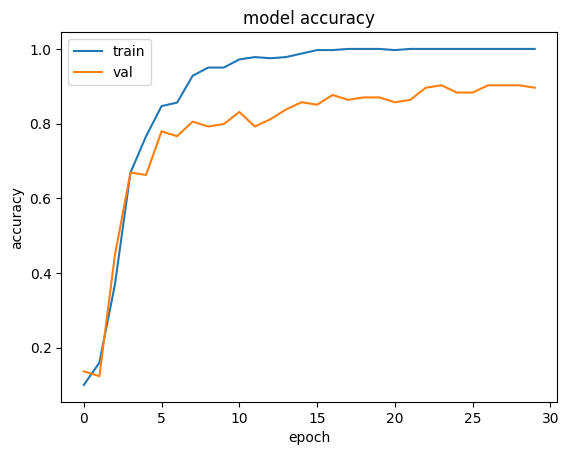

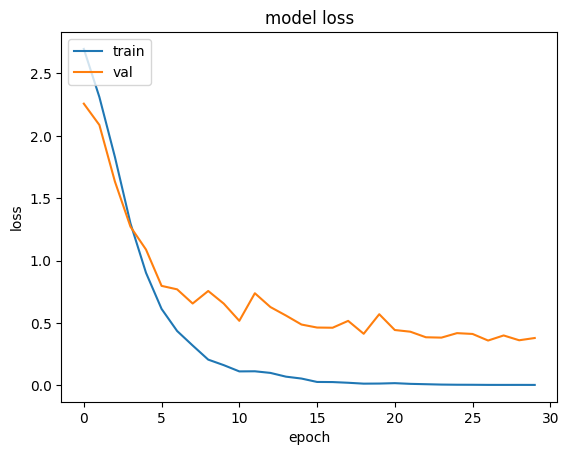

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
# Softmax for multiclass
flatten = Flatten()(vgg_model.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output2 = Dense(units=10, activation='softmax')(dense_4) 

model2 = Model(inputs=vgg_model.input, outputs=dense_output2)
model2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [49]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)
model2_history = model2.fit_generator(training_set,
                                      steps_per_epoch = len(training_set),
                                      epochs = 30,
                                      validation_data = val_set,
                                      validation_steps = len(val_set))

Epoch 1/30
10/10 [==============================] - 281s 28s/step - loss: 3.1670 - accuracy: 0.1219 - val_loss: 2.1373 - val_accuracy: 0.1883
Epoch 2/30
10/10 [==============================] - 287s 29s/step - loss: 2.4332 - accuracy: 0.1781 - val_loss: 2.0714 - val_accuracy: 0.3506
Epoch 3/30
10/10 [==============================] - 300s 30s/step - loss: 1.9052 - accuracy: 0.4094 - val_loss: 1.6572 - val_accuracy: 0.4935
Epoch 4/30
10/10 [==============================] - 292s 29s/step - loss: 1.5022 - accuracy: 0.4938 - val_loss: 1.4909 - val_accuracy: 0.5260
Epoch 5/30
10/10 [==============================] - 316s 32s/step - loss: 1.1576 - accuracy: 0.6313 - val_loss: 1.0358 - val_accuracy: 0.6753
Epoch 6/30
10/10 [==============================] - 299s 30s/step - loss: 0.8733 - accuracy: 0.7250 - val_loss: 0.8696 - val_accuracy: 0.7662
Epoch 7/30
10/10 [==============================] - 287s 29s/step - loss: 0.5885 - accuracy: 0.8562 - val_loss: 0.6992 - val_accuracy: 0.7922
Epoch 

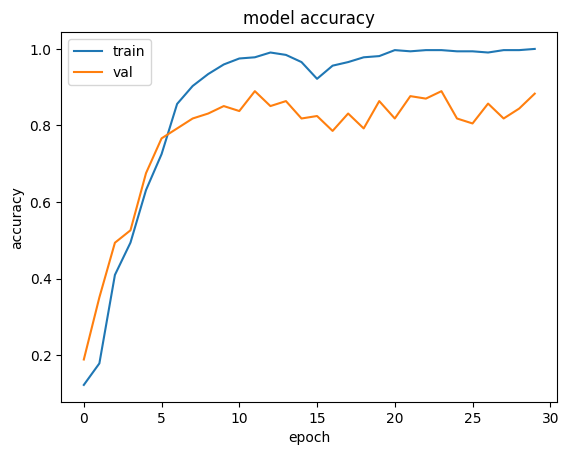

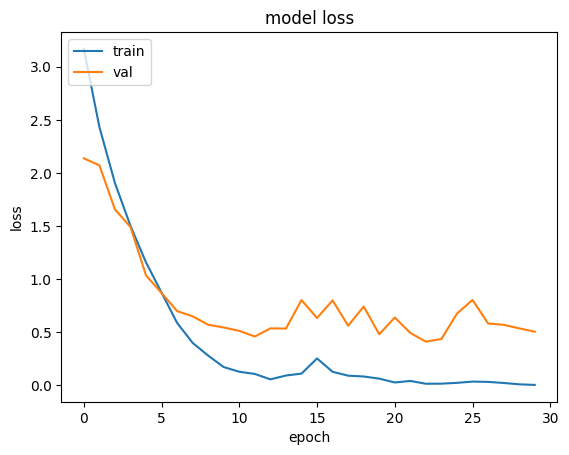

In [50]:
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
# Save the model
import pickle

# Save the model to a file named "model.pkl"
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://611dcfec-44ed-417b-a65d-8edbe3abce75/assets


INFO:tensorflow:Assets written to: ram://611dcfec-44ed-417b-a65d-8edbe3abce75/assets


In [53]:
# Saving the model for Future Inferences
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

### Real-time Webcam Facial Detection

In [ ]:
cap = cv2.VideoCapture(0)

hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)

        for n in range(0, 16):
            x = face_landmarks.part(n).x
            y = face_landmarks.part(n).y
            cv2.circle(frame, (x, y), 1, (0, 255, 255), 1)


    cv2.imshow("Face Landmarks", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()